In [1]:
from squlearn import Executor

from qiskit_ibm_runtime import QiskitRuntimeService,Sampler,Session

from qiskit import QuantumCircuit

service = QiskitRuntimeService(channel="ibm_quantum")


In [2]:
l = service.backends()

exec = Executor(l,max_session_time=200)
print(exec.backend_list)

self._remote True
self._estimator None
type(self._estimator) <class 'NoneType'>
[<IBMBackend('ibmq_kolkata')>, <IBMBackend('ibmq_mumbai')>, <IBMBackend('ibm_hanoi')>, <IBMBackend('ibm_sherbrooke')>, <IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_algiers')>, <IBMBackend('ibm_nazca')>, <IBMBackend('ibm_cusco')>, <IBMBackend('ibm_kyoto')>, <IBMBackend('ibm_osaka')>, <IBMBackend('ibm_cairo')>, <IBMBackend('ibm_torino')>, <IBMBackend('ibmq_qasm_simulator')>, <IBMBackend('simulator_extended_stabilizer')>, <IBMBackend('simulator_mps')>, <IBMBackend('simulator_statevector')>, <IBMBackend('simulator_stabilizer')>]


Number of backends available with given parameters:12
Mode: quality using Mapomatic
Input circuit needs 3 qubits
Transpiling circuit 1 times for 1 compatible backends...
Two-qubit gate count: [0]
Best Two-qubit gate count (ID:0): 0 
Transpiled circuit needs 3 qubits
Searching best sub-layout on 12 backends...
Best sub-layout: [34, 39, 40] on backend: ibm_torino. Error_rate: 0.044681811376721


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


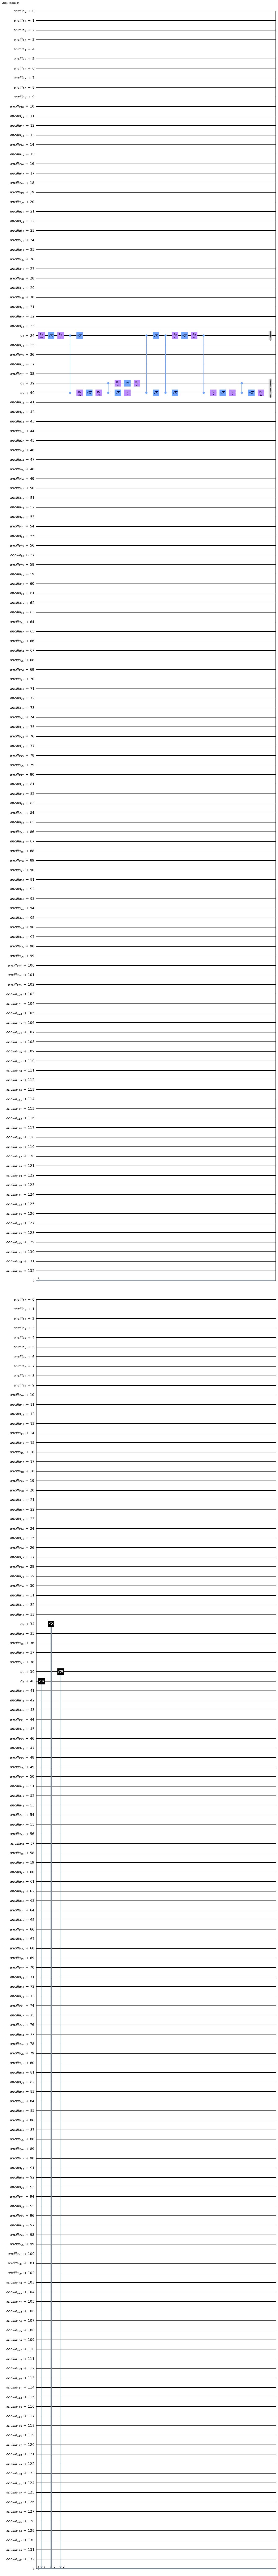

In [3]:
circ = QuantumCircuit(3)

circ.h(range(3))
circ.cx(0,1)
circ.cx(1,2)
circ.cx(2,0)
circ.measure_all()

transpiled_circ,info = exec.select_backend(circ)

transpiled_circ.draw()

In [4]:
exec.backend 

<IBMBackend('ibm_torino')>

In [5]:
print(info)

(Layout({
34: Qubit(QuantumRegister(3, 'q'), 0),
39: Qubit(QuantumRegister(3, 'q'), 1),
40: Qubit(QuantumRegister(3, 'q'), 2),
0: Qubit(QuantumRegister(130, 'ancilla'), 0),
1: Qubit(QuantumRegister(130, 'ancilla'), 1),
2: Qubit(QuantumRegister(130, 'ancilla'), 2),
3: Qubit(QuantumRegister(130, 'ancilla'), 3),
4: Qubit(QuantumRegister(130, 'ancilla'), 4),
5: Qubit(QuantumRegister(130, 'ancilla'), 5),
6: Qubit(QuantumRegister(130, 'ancilla'), 6),
7: Qubit(QuantumRegister(130, 'ancilla'), 7),
8: Qubit(QuantumRegister(130, 'ancilla'), 8),
9: Qubit(QuantumRegister(130, 'ancilla'), 9),
10: Qubit(QuantumRegister(130, 'ancilla'), 10),
11: Qubit(QuantumRegister(130, 'ancilla'), 11),
12: Qubit(QuantumRegister(130, 'ancilla'), 12),
13: Qubit(QuantumRegister(130, 'ancilla'), 13),
14: Qubit(QuantumRegister(130, 'ancilla'), 14),
15: Qubit(QuantumRegister(130, 'ancilla'), 15),
16: Qubit(QuantumRegister(130, 'ancilla'), 16),
17: Qubit(QuantumRegister(130, 'ancilla'), 17),
18: Qubit(QuantumRegister(130

In [6]:
sampler = exec.get_sampler()


job = sampler.run(transpiled_circ)


self._estimator None
type(self._estimator) <class 'NoneType'>
